### **DATA MINING FINAL PROJECT – Customer Loyalty Prediction**

---

### Group       :   **Powerpuff Girls Group**

Members     :   
- Sekarlintang Khairilaracelli Laveva Ken Handita 102022340251
- Maurithania Joleesha Maria Tjakra               102022340119
- Gia Putri Pratiwi                               102022340192

Class       :   SI47INT

---

### **📄 Dataset Information**

The dataset used in this project contains information about customer purchasing behaviors from a retail business. It aims to understand customer loyalty patterns and purchasing habits through clustering and predictive modeling. The dataset includes key customer attributes such as:

- **Customer ID** : Unique identifier for each customer
- **Gender** : Customer's gender
- **Age** : Customer's age
- **Annual Income** : Total income of the customer per year
- **Purchase Amount** : Total spending amount by the customer
- **Purchase Frequency** : Number of times the customer made a purchase
- **Loyalty Score** : Score from 1 to 10 representing how loyal the customer is

The goal is to use K-Means Clustering to group similar customers based on behavior, and use Logistic Regression to predict whether a customer is loyal or not loyal.

An interactive dashboard was also built using Streamlit, allowing users to:

* Visualize customer clusters and loyalty segments
* Input new customer data and get real-time predictions of loyalty
* Understand which features impact customer loyalty the most

---

### **💼 Business Understanding**

Customer loyalty is a key factor for business sustainability and long-term profitability. Understanding the characteristics of loyal vs. non-loyal customers can help businesses design better marketing strategies, reward programs, and improve customer retention.

The main goal of this analysis is to identify what influences customer loyalty based on their purchasing behavior using machine learning techniques.

### **❓ Problem Statement**

"How can we classify and understand the behavior of loyal vs. non-loyal customers based on key attributes like income, purchase amount, and frequency?"

We aim to use unsupervised and supervised learning techniques to:
- Group customers with similar behaviors
- Predict whether a customer is loyal or not

---

### **Stages of Work**

1. **Read Data:** Load and explore the dataset used for clustering and classification.
2. **Data Preparation:**  Clean the data, engineer target variable (is_loyal), and select relevant features.
3. **Exploratory Data Analysis (EDA):** Visualize customer behavior, distributions, and insights.
4. **Clustering (Unsupervised Learning):** Apply K-Means to group customers into distinct segments.
5. **Classification (Supervised Learning):** Build a logistic regression model to predict customer loyalty.
6. **Model Evaluation:** Analyze classification performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
7. **Dashboard Deployment:** Create an interactive Streamlit dashboard to visualize insights and enable real-time predictions.
---

### **Project Objective**

Based on the case study, the following tasks are addressed in this project:

* Analyze customer purchasing behavior using descriptive statistics and visualizations
* Apply unsupervised learning (K-Means) to identify customer segments
* Build a supervised model (Logistic Regression) to predict loyal customers
* Interpret model results to derive actionable business insights
* Deploy an interactive dashboard using Streamlit

---

## **Read Data**

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import silhouette_score

#### Load the dataset and preview the data

In [2]:
df = pd.read_csv("Customer Purchasing Behaviors.csv")
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


#### Dataset Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


#### Missing Values

In [4]:
print(df.isnull().sum())

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64


#### Descriptive Statistics

In [5]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


## **Exploratory Data Analysis (EDA)**


#### Univariate Analysis

##### Age distribution

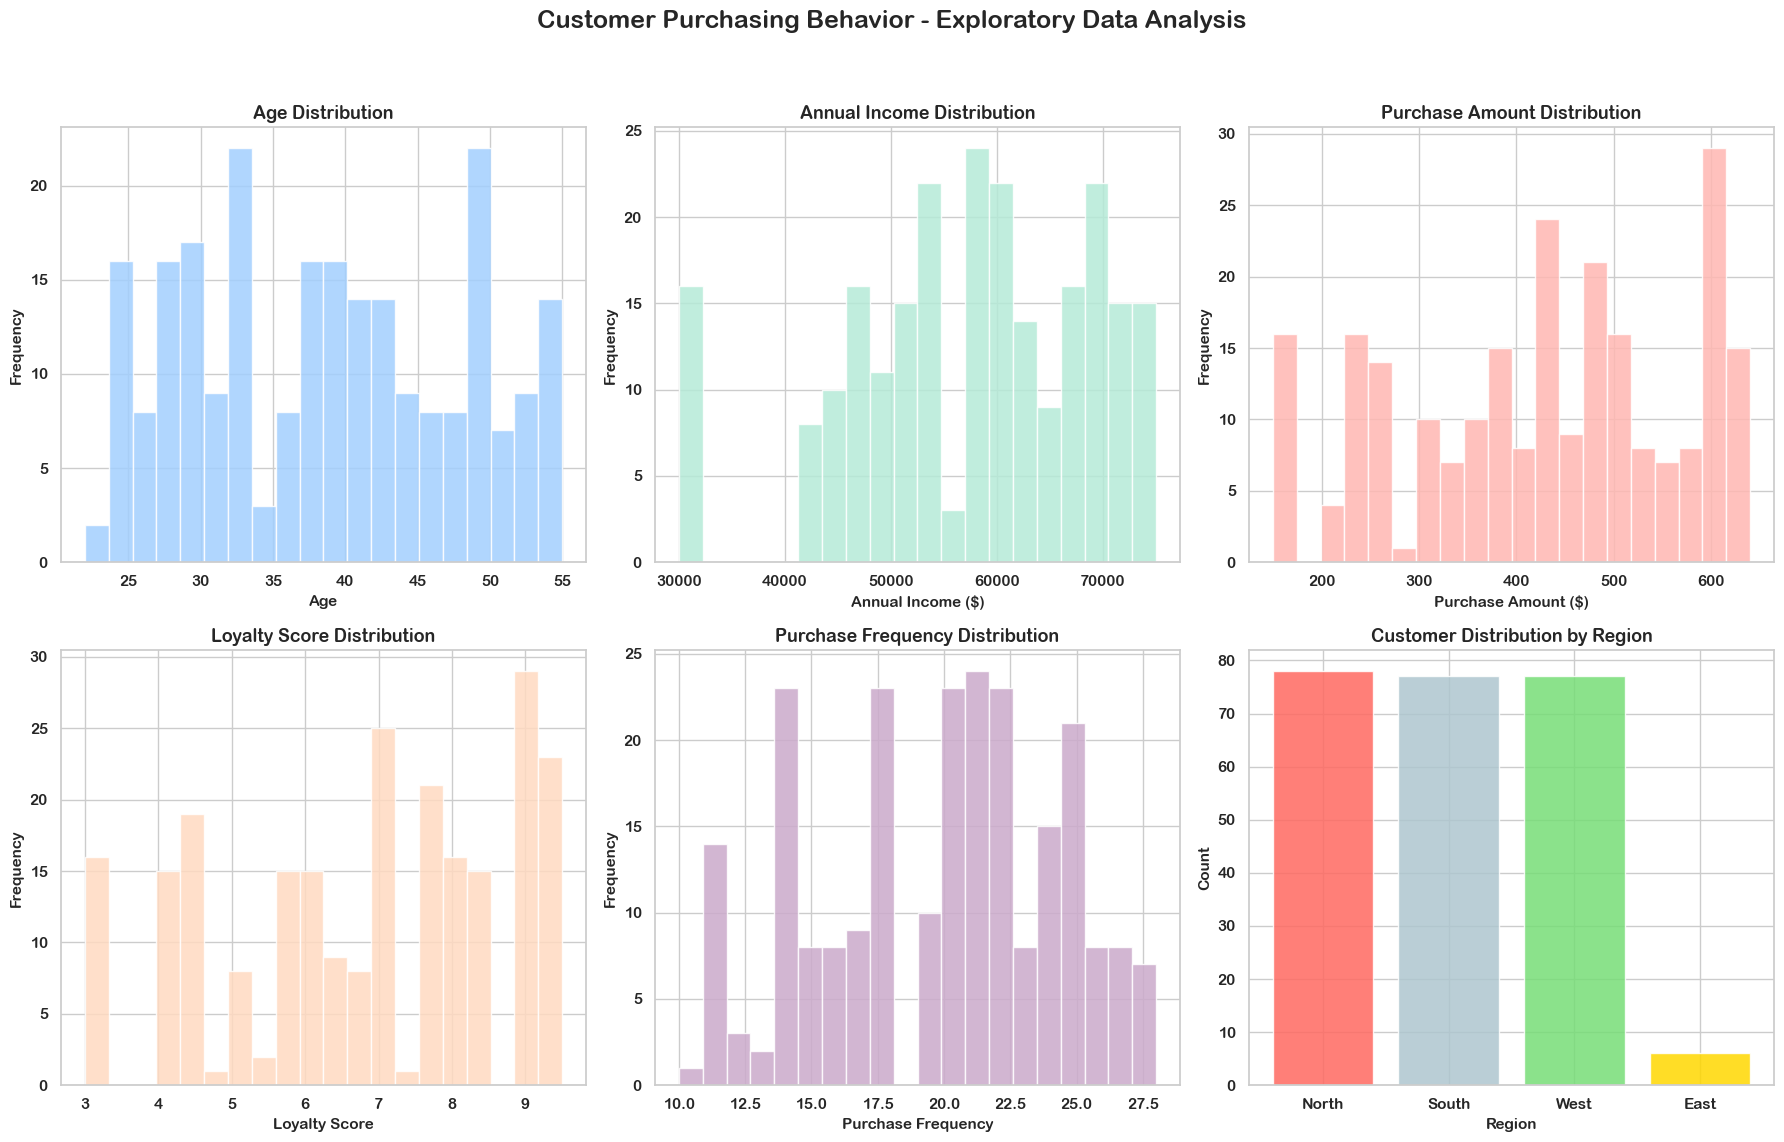

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams.update({
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "font.family": "sans-serif",
    "font.sans-serif": ["Segoe UI", "Arial Rounded MT Bold", "Comic Sans MS"],
})

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Customer Purchasing Behavior - Exploratory Data Analysis', fontsize=18, fontweight='bold')

# colors agar lucu
colors = {
    'age': '#A2CFFE',             
    'income': '#B5EAD7',           
    'purchase': '#FFB7B2',        
    'loyalty': '#FFDAC1',         
    'frequency': '#CBAACB',       
    'region': ['#FF6961', '#AEC6CF', '#77DD77', '#FFD700']  
}

# Age distribution
axes[0,0].hist(df['age'], bins=20, alpha=0.85, color=colors['age'], edgecolor='white')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Income distribution
axes[0,1].hist(df['annual_income'], bins=20, alpha=0.85, color=colors['income'], edgecolor='white')
axes[0,1].set_title('Annual Income Distribution')
axes[0,1].set_xlabel('Annual Income ($)')
axes[0,1].set_ylabel('Frequency')

# Purchase amount distribution
axes[0,2].hist(df['purchase_amount'], bins=20, alpha=0.85, color=colors['purchase'], edgecolor='white')
axes[0,2].set_title('Purchase Amount Distribution')
axes[0,2].set_xlabel('Purchase Amount ($)')
axes[0,2].set_ylabel('Frequency')

# Loyalty score distribution
axes[1,0].hist(df['loyalty_score'], bins=20, alpha=0.85, color=colors['loyalty'], edgecolor='white')
axes[1,0].set_title('Loyalty Score Distribution')
axes[1,0].set_xlabel('Loyalty Score')
axes[1,0].set_ylabel('Frequency')

# Purchase frequency distribution
axes[1,1].hist(df['purchase_frequency'], bins=20, alpha=0.85, color=colors['frequency'], edgecolor='white')
axes[1,1].set_title('Purchase Frequency Distribution')
axes[1,1].set_xlabel('Purchase Frequency')
axes[1,1].set_ylabel('Frequency')

# Region distribution (bar chart)
region_counts = df['region'].value_counts()
axes[1,2].bar(region_counts.index, region_counts.values, color=colors['region'], alpha=0.85, edgecolor='white')
axes[1,2].set_title('Customer Distribution by Region')
axes[1,2].set_xlabel('Region')
axes[1,2].set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


#### Correlation analysis

In [7]:
print("\nCorrelation Matrix:")
numeric_cols = ['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)


Correlation Matrix:
                         age  annual_income  purchase_amount  loyalty_score  \
age                 1.000000       0.974833         0.986140       0.981835   
annual_income       0.974833       1.000000         0.984208       0.984351   
purchase_amount     0.986140       0.984208         1.000000       0.994147   
loyalty_score       0.981835       0.984351         0.994147       1.000000   
purchase_frequency  0.980532       0.982920         0.993579       0.986990   

                    purchase_frequency  
age                           0.980532  
annual_income                 0.982920  
purchase_amount               0.993579  
loyalty_score                 0.986990  
purchase_frequency            1.000000  


#### Correlation heatmap

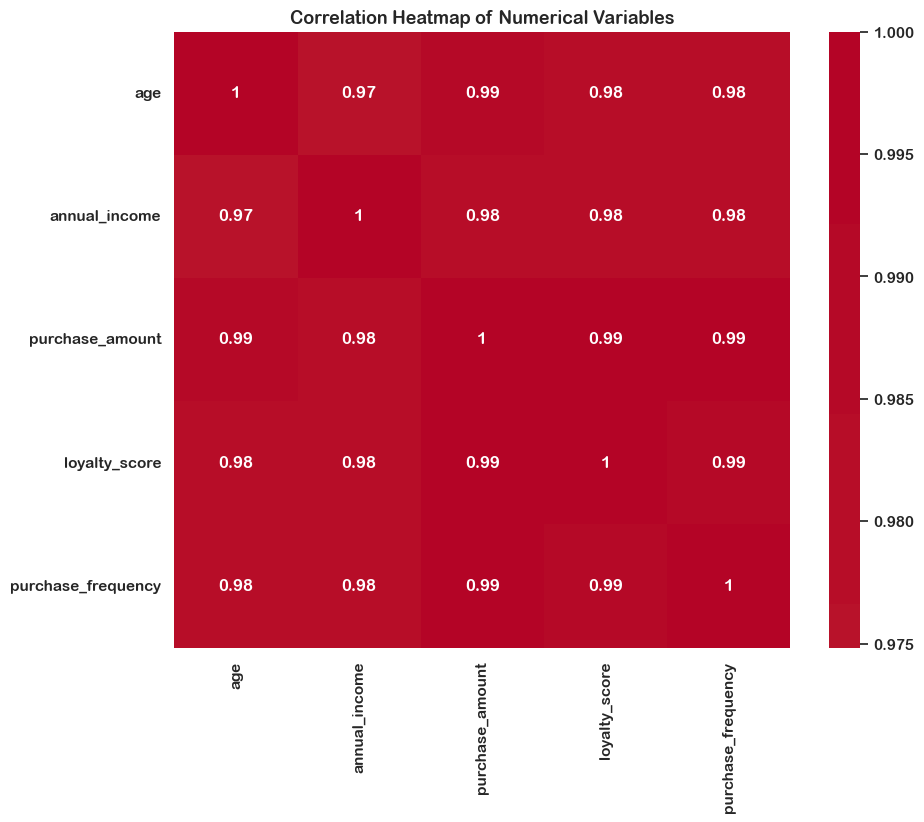

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

#### Regional analysis

In [9]:
print("Regional Analysis:")
regional_stats = df.groupby('region')[numeric_cols].mean()
print(regional_stats)

Regional Analysis:
              age  annual_income  purchase_amount  loyalty_score  \
region                                                             
East    31.666667   49000.000000       320.000000       5.400000   
North   34.358974   53038.461538       358.589744       5.865385   
South   38.000000   55766.233766       416.883117       6.725974   
West    44.272727   64129.870130       510.519481       7.911688   

        purchase_frequency  
region                      
East             16.666667  
North            17.653846  
South            19.467532  
West             22.545455  


### Relationships Between Variables

#### Income vs. Purchase Amount (by Region)

/var/folders/x_/9rnr_wgd21117hhpdw1hp1sr0000gn/T/ipykernel_6650/1295310639.py:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(


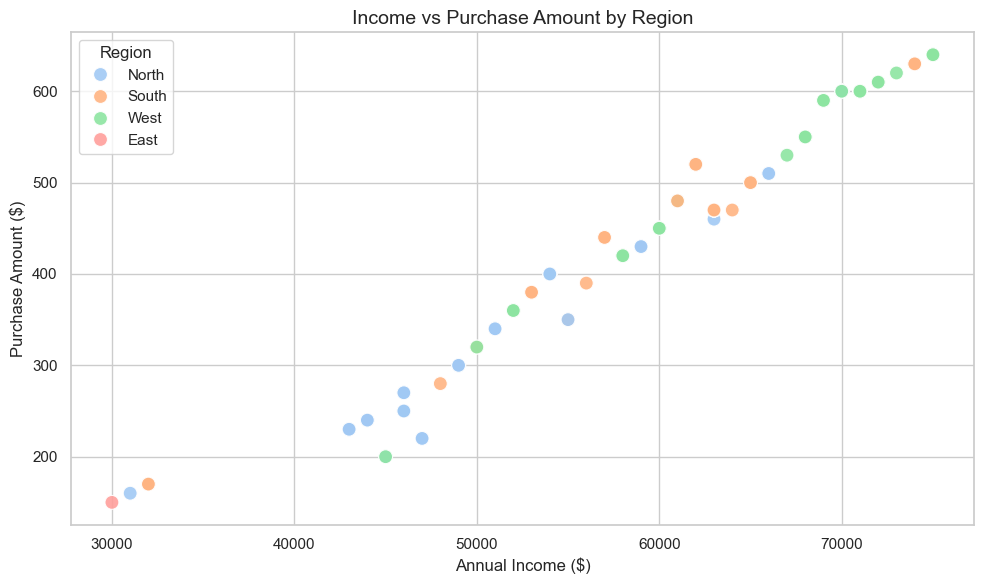

In [10]:
sns.set(style="whitegrid")
pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='annual_income',
    y='purchase_amount',
    hue='region',
    palette=pastel_palette,
    data=df,
    s=100,
    edgecolor='white',
    alpha=0.9
)

plt.xlabel("Annual Income ($)", fontsize=12)
plt.ylabel("Purchase Amount ($)", fontsize=12)
plt.title("Income vs Purchase Amount by Region", fontsize=14)

plt.legend(title='Region')
plt.tight_layout()
plt.show()

This scatter plot shows a strong positive correlation between annual income and purchase amount. This confirms that **customers with higher income levels tend to spend more**.

Each dot represents a customer, colored by region:
- Customers from the **West** region are more present in the higher income/spending segment.
- **North** and **South** regions have a more even spread across different income levels.
- **East** region has very few data points, suggesting it may represent a smaller portion of the customer base.

This insight is helpful for regional marketing strategies and customer segmentation.

#### Correlation matrix

## **Data Preparation**

In [11]:
clustering_features = ['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']
X_cluster = df[clustering_features].copy()

#### Standardize features for clustering

In [12]:
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

#### Create binary target for classification (high loyalty >= 7.0)

In [13]:
df['high_loyalty'] = (df['loyalty_score'] >= 7.0).astype(int)
print(f"\nTarget Variable Distribution:")
print(df['high_loyalty'].value_counts())
print(f"Percentage of high loyalty customers: {df['high_loyalty'].mean():.2%}")


Target Variable Distribution:
high_loyalty
1    122
0    116
Name: count, dtype: int64
Percentage of high loyalty customers: 51.26%


## **Clustering**

In [14]:
inertias = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

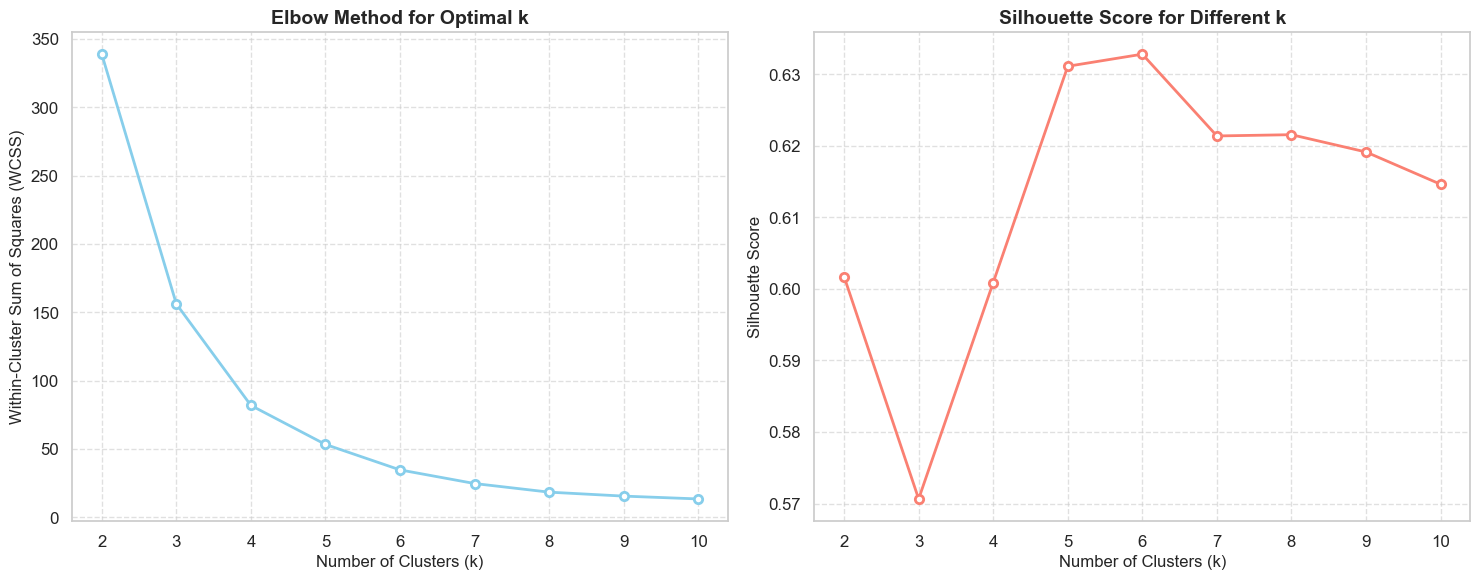

In [15]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# buat subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow Method Plot
ax1.plot(k_range, inertias, 'o-', color='skyblue', linewidth=2, markerfacecolor='white', markeredgewidth=2)
ax1.set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Silhouette Score Plot
ax2.plot(k_range, silhouette_scores, 'o-', color='salmon', linewidth=2, markerfacecolor='white', markeredgewidth=2)
ax2.set_title('Silhouette Score for Different k', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)

# Layout
plt.tight_layout()
plt.show()


#### Determine optimal k (use k=3 based on elbow method)

In [16]:
optimal_k = 3
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


#### Perform K-means clustering with optimal k

In [17]:
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

#### Add cluster labels to dataframe

In [18]:
df['cluster'] = cluster_labels

#### Evaluate clustering

In [19]:
silhouette_avg = silhouette_score(X_cluster_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.571


#### Cluster analysis

In [20]:
print("Cluster Analysis:")
cluster_stats = df.groupby('cluster')[clustering_features].mean()
print(cluster_stats)

Cluster Analysis:
               age  annual_income  purchase_amount  loyalty_score  \
cluster                                                             
0        36.926316   56778.947368       416.631579       6.744211   
1        49.228916   69228.915663       576.024096       8.787952   
2        26.850000   42050.000000       231.833333       4.115000   

         purchase_frequency  
cluster                      
0                 19.557895  
1                 24.590361  
2                 13.550000  


#### Cluster interpretation

In [21]:
print("Cluster Sizes:")
print(df['cluster'].value_counts().sort_index())

Cluster Sizes:
cluster
0    95
1    83
2    60
Name: count, dtype: int64


## Interpretation of Clusters

### Cluster 0 – Moderate Spenders with Average Loyalty

This cluster includes middle-aged customers with moderate income and purchasing behavior. Their loyalty and purchase frequency are average, suggesting a steady but not highly engaged group. Marketing efforts could focus on loyalty programs or incentives to boost repeat purchases and deepen engagement.

---

### Cluster 1 – High-Value Loyal Customers

This group consists of older, higher-income customers who make frequent, high-value purchases and show strong loyalty. They represent the most valuable segment and are ideal candidates for premium offerings, exclusive promotions, or VIP loyalty rewards to maintain their engagement.

---

### Cluster 2 – Young Low-Spending Customers

These are younger customers with lower income and spending. They purchase less frequently and have lower loyalty scores. Targeted campaigns such as discounts, referral bonuses, or personalized engagement could help increase their purchase frequency and build loyalty over time.

#### Visualize clusters (2D projection using income and purchase_amount)

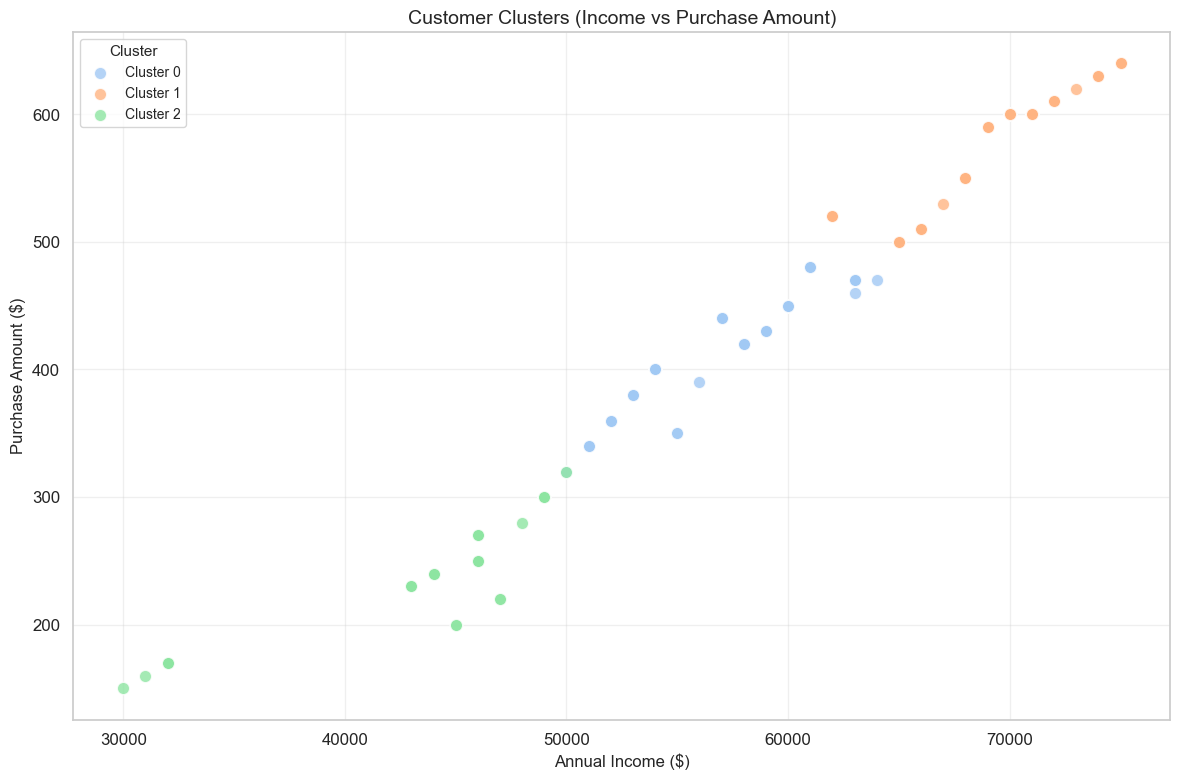

In [22]:
soft_palette = sns.color_palette("pastel", n_colors=len(df['cluster'].unique()))

plt.figure(figsize=(12, 8))

for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(
        cluster_data['annual_income'], 
        cluster_data['purchase_amount'],
        color=soft_palette[cluster_id],
        label=f'Cluster {cluster_id}',
        alpha=0.8,
        edgecolor='white',
        s=80
    )

plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Purchase Amount ($)', fontsize=12)
plt.title('Customer Clusters (Income vs Purchase Amount)', fontsize=14)

plt.legend(title="Cluster", fontsize=10, title_fontsize=11)

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Cluster interpretation

In [23]:
print("Cluster Interpretation:")
for i in range(optimal_k):
    cluster_data = df[df['cluster'] == i]
    print(f"\nCluster {i} ({len(cluster_data)} customers):")
    print(f"  Average Age: {cluster_data['age'].mean():.1f}")
    print(f"  Average Income: ${cluster_data['annual_income'].mean():,.0f}")
    print(f"  Average Purchase: ${cluster_data['purchase_amount'].mean():.0f}")
    print(f"  Average Loyalty: {cluster_data['loyalty_score'].mean():.1f}")
    print(f"  Average Frequency: {cluster_data['purchase_frequency'].mean():.1f}")


Cluster Interpretation:

Cluster 0 (95 customers):
  Average Age: 36.9
  Average Income: $56,779
  Average Purchase: $417
  Average Loyalty: 6.7
  Average Frequency: 19.6

Cluster 1 (83 customers):
  Average Age: 49.2
  Average Income: $69,229
  Average Purchase: $576
  Average Loyalty: 8.8
  Average Frequency: 24.6

Cluster 2 (60 customers):
  Average Age: 26.9
  Average Income: $42,050
  Average Purchase: $232
  Average Loyalty: 4.1
  Average Frequency: 13.6


## Cluster 0 – “Moderate Spenders with Average Loyalty”

* **Size:** 95 customers  
* **Average Age:** 36.9  
* **Average Income:** $56,779  
* **Average Purchase Amount:** $417  
* **Average Loyalty Score:** 6.7  
* **Average Purchase Frequency:** 19.6  

**Interpretation:**  
This group represents middle-aged customers with moderate income and relatively average purchasing behavior. They are moderately loyal and shop at a stable frequency. Marketing strategies for this group could focus on loyalty programs or rewards to increase engagement.

---

## Cluster 1 – “High-Value Loyal Customers”

* **Size:** 83 customers  
* **Average Age:** 49.2  
* **Average Income:** $69,229  
* **Average Purchase Amount:** $576  
* **Average Loyalty Score:** 8.8  
* **Average Purchase Frequency:** 24.6  

**Interpretation:**  
This is the most valuable customer segment—older, high-income individuals with strong loyalty and frequent, high-value purchases. They are ideal targets for premium services, early access offers, or VIP perks to maintain and reward their loyalty.

---

## Cluster 2 – “Young Low-Spending Customers”

* **Size:** 60 customers  
* **Average Age:** 26.9  
* **Average Income:** $42,050  
* **Average Purchase Amount:** $232  
* **Average Loyalty Score:** 4.1  
* **Average Purchase Frequency:** 13.6  

**Interpretation:**  
These customers are younger, lower-income, and make less frequent and smaller purchases. They also have lower loyalty scores. This segment could benefit from engagement campaigns, discounts, or referral programs to encourage more frequent purchasing and build loyalty.

## **SUPERVISED LEARNING: LOGISTIC REGRESSION**

#### Prepare features for classification, Include region as categorical variable

In [24]:
le = LabelEncoder()
df['region_encoded'] = le.fit_transform(df['region'])

#### Features for classification

In [25]:
classification_features = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency', 'region_encoded']
X = df[classification_features]
y = df['high_loyalty']


#### Split the data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Test set class distribution: {np.bincount(y_test)}")

Training set size: 190
Test set size: 48
Training set class distribution: [93 97]
Test set class distribution: [23 25]


#### Scale features for logistic regression

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train logistic regression model

In [28]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### Make predictions

In [29]:
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

#### Model evaluation

In [30]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [31]:
print(f"Logistic Regression Results:")
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

Logistic Regression Results:
Accuracy: 0.917
ROC-AUC: 1.000


####  Detailed classification report

In [32]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.86      1.00      0.93        25

    accuracy                           0.92        48
   macro avg       0.93      0.91      0.92        48
weighted avg       0.93      0.92      0.92        48



#### Confusion matrix

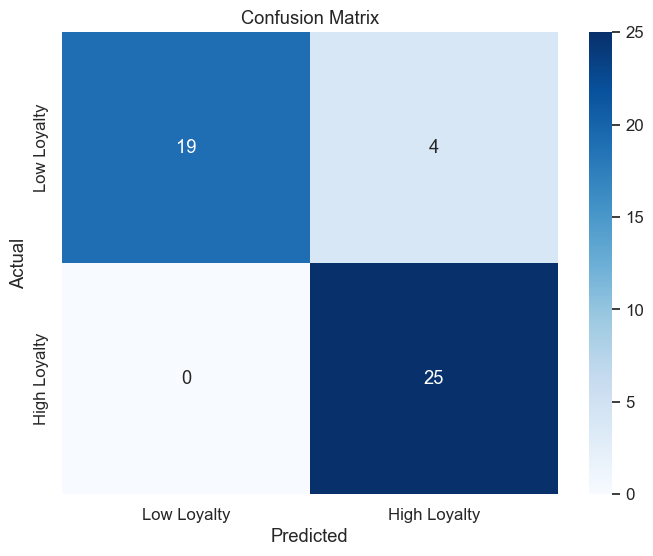

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low Loyalty', 'High Loyalty'],
            yticklabels=['Low Loyalty', 'High Loyalty'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### ROC Curve

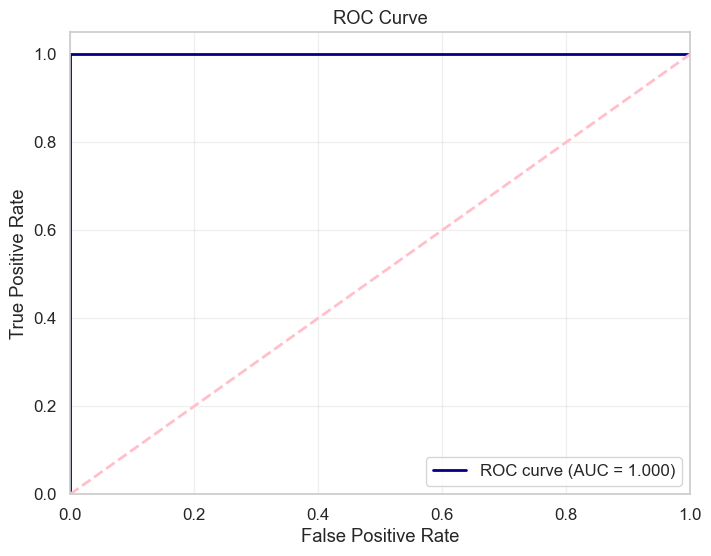

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='pink', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

#### Feature importance (coefficients)

In [35]:
feature_importance = pd.DataFrame({
    'feature': classification_features,
    'coefficient': log_reg.coef_[0],
    'abs_coefficient': np.abs(log_reg.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("Feature Importance (Logistic Regression Coefficients):")
print(feature_importance)

Feature Importance (Logistic Regression Coefficients):
              feature  coefficient  abs_coefficient
0                 age     2.149716         2.149716
3  purchase_frequency     1.634809         1.634809
2     purchase_amount     1.480587         1.480587
1       annual_income     1.325722         1.325722
4      region_encoded     0.491294         0.491294


The logistic regression model predicts the likelihood of a customer making a purchase. The coefficients indicate the direction and strength of the influence each feature has on the probability of purchase.

1. Age (coefficient = 2.15): For each additional year in age, the odds of making a purchase increase by a factor of exp(2.15) ≈ 8.58.
This means that older customers are significantly more likely to make a purchase.

2. Purchase Frequency (coefficient = 1.63): Each one-unit increase in purchase frequency increases the odds of purchasing by exp(1.63) ≈ 5.10.
Customers who purchase more frequently are much more likely to continue making purchases.

3. Purchase Amount (coefficient = 1.48): For each additional unit in purchase amount, the odds of purchasing increase by exp(1.48) ≈ 4.39.
Customers who spend more are more likely to return and make further purchases.

4. Annual Income (coefficient = 1.33): Every increase in annual income by one unit increases the odds of purchasing by exp(1.33) ≈ 3.78.
Customers with higher income levels are more likely to make purchases.

5. Region Encoded (coefficient = 0.49): Depending on the customer’s region (as encoded numerically), the odds of purchasing increase by exp(0.49) ≈ 1.63.
This suggests that certain regions have a slightly higher likelihood of customers making purchases, but the effect is relatively weaker compared to other features.



#### Visualize feature importance

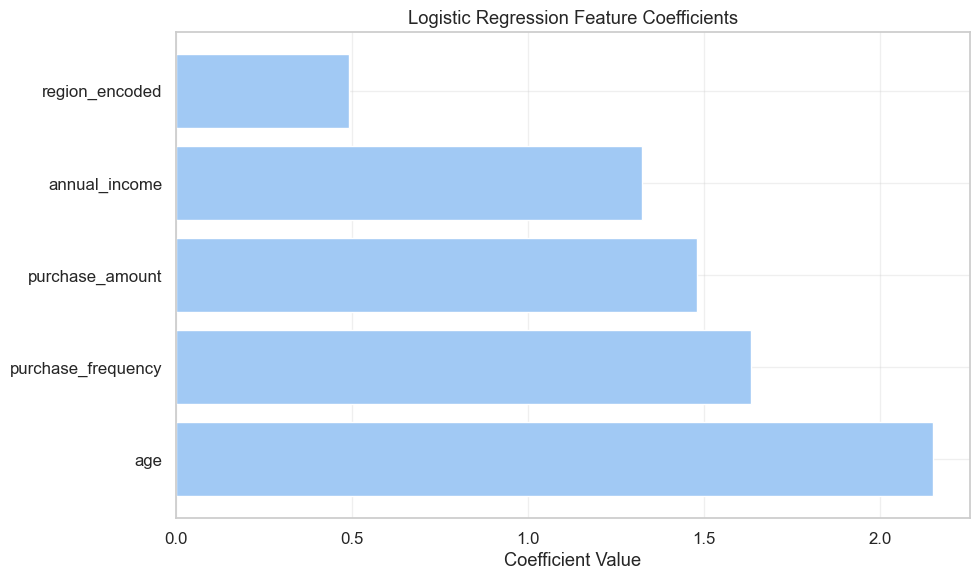

In [36]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['coefficient'])
plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Statistical significance (p-values)

In [37]:
from scipy import stats

#### Calculate z-scores for coefficients

In [38]:
z_scores = log_reg.coef_[0] / np.std(X_train_scaled, axis=0)
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_scores)))

significance_df = pd.DataFrame({
    'feature': classification_features,
    'coefficient': log_reg.coef_[0],
    'z_score': z_scores,
    'p_value': p_values,
    'significant': p_values < 0.05
})

print("Coefficient Significance Analysis:")
print(significance_df)

Coefficient Significance Analysis:
              feature  coefficient   z_score   p_value  significant
0                 age     2.149716  2.149716  0.031578         True
1       annual_income     1.325722  1.325722  0.184932        False
2     purchase_amount     1.480587  1.480587  0.138717        False
3  purchase_frequency     1.634809  1.634809  0.102089        False
4      region_encoded     0.491294  0.491294  0.623219        False


## **Logistic Regression**

#### Import Library

#### Model Training

In [39]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Predict

In [40]:
y_pred = model.predict(X_test)

#### **Evaluate Model**

#### Import Library

In [41]:
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Get Intercept and Coefficient

In [42]:
intercept = model.intercept_
coefficients = model.coef_

In [43]:
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: [-50.65860288]
Coefficients: [[ 1.77478650e+00 -1.48242615e-04 -4.92725874e-02  5.81193637e-01
   6.22511032e-01]]


1. Age (coefficient = 1.77)
Each additional year of age increases the log-odds of high loyalty by 1.77, which translates to odds increasing by a factor of exp(1.77) ≈ 5.87.
Older customers are much more likely to be highly loyal.

2. Annual Income (coefficient = -0.00015)
Each unit increase in income slightly decreases the log-odds of high loyalty.
However, the effect is negligibly small and likely not practically significant, especially since income values are large.

3. Purchase Amount (coefficient = -0.0493)
Each unit increase in purchase amount decreases the log-odds by 0.0493 (exp(-0.0493) ≈ 0.95).
This suggests that higher spending may be slightly associated with lower loyalty, which could indicate one-time big spenders rather than loyal customers.

4. Loyalty Score (coefficient = 0.5812)
As expected, an increase in loyalty score increases the likelihood of being in the high loyalty class.
This variable strongly reinforces the target definition.

5. Purchase Frequency (coefficient = 0.6225)
Customers who purchase more frequently are more likely to be highly loyal.
For each additional purchase, the odds of being a high-loyalty customer increase by a factor of exp(0.6225) ≈ 1.86.

### **Deployment**

Save Model

In [44]:
import joblib

joblib.dump(model, "model.pkl")
joblib.dump(kmeans_final, "kmeans_model.pkl")

['kmeans_model.pkl']

Configure token

In [45]:
!ngrok config add-authtoken 2wst0LXHVT6uaOFiHroOofHI68H_6WqcB1dEZ3cP3ZLgpjubi

Authtoken saved to configuration file: /Users/than/Library/Application Support/ngrok/ngrok.yml


Streamlit configuration for deployment

In [46]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.express as px
import traceback

st.set_page_config(
    page_title="Customer Loyalty Prediction Dashboard",
    page_icon="🎯",
)
st.title("🎯 Customer Loyalty Prediction App")
st.write("Enter customer data to predict whether the customer is loyal or not.")

st.markdown("---")
st.subheader("📊 Model Evaluation")

@st.cache_data
def load_data_and_model():
    data = pd.read_csv("Customer Purchasing Behaviors.csv")
    model = joblib.load("model.pkl")
    return data, model

data, model = load_data_and_model()

# Preprocessing
data = data.drop(['user_id'], axis=1)
region_map = {'North':0, 'South':1, 'West':2, 'East':3}
data['region'] = data['region'].map(region_map)
data['loyal_customer'] = (data['loyalty_score'] >= 7.0).astype(int)

X = data.drop(['loyalty_score', 'loyal_customer'], axis=1)
y = data['loyal_customer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

try:
    model.n_estimators
except AttributeError:
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

# Predict on TEST set only to match the Jupyter Notebook
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation on test set
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Use this confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the metrics
col1, col2, col3, col4 = st.columns(4)
col1.success(f"Accuracy: **{acc:.2f}**")
col2.info(f"Precision: **{prec:.2f}**")
col3.warning(f"Recall: **{rec:.2f}**")
col4.error(f"ROC AUC: **{roc_auc:.2f}**")


# Clustering setup
cluster_features = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency']
X_cluster = data[cluster_features].copy()

scaler_cluster = StandardScaler()
X_scaled_cluster = scaler_cluster.fit_transform(X_cluster)

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_scaled_cluster)

cluster_names = {
    0: "Moderate Spenders with Average Loyalty",
    1: "High-Value Loyal Customers",
    2: "Young Low-Spending Customers"
}

# Visuals
plot_option = st.selectbox("📈 Visualize:", [
    "Select", "ROC AUC Curve", "Confusion Matrix", "Customer Clusters", "Cluster Analysis"
])

if plot_option == "ROC AUC Curve":
    st.subheader("📈 ROC Curve")
    fpr, tpr, _ = roc_curve(y, y_prob)
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve')
    ax.legend()
    st.pyplot(fig)

elif plot_option == "Confusion Matrix":
    st.subheader("🧾 Confusion Matrix (Test Set Only)")
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Low Loyalty', 'High Loyalty'],
                yticklabels=['Low Loyalty', 'High Loyalty'],
                ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    st.pyplot(fig)


elif plot_option == "Customer Clusters":
    st.subheader("🧩 Customer Clustering")
    clusters = kmeans_model.predict(X_scaled_cluster)
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = clusters.astype(str)

    col1, col2 = st.columns(2)
    with col1:
        fig2 = px.scatter(
            data_with_clusters,
            x='annual_income',
            y='purchase_amount',
            color='Cluster',
            size='purchase_frequency',
            hover_data=['age', 'loyalty_score'],
            title='Income vs Purchase Amount'
        )
        st.plotly_chart(fig2, use_container_width=True)
    
    with col2:
        fig3 = px.scatter(
            data_with_clusters,
            x='age',
            y='purchase_frequency',
            color='Cluster',
            size='annual_income',
            hover_data=['purchase_amount', 'loyalty_score'],
            title='Age vs Purchase Frequency'
        )
        st.plotly_chart(fig3, use_container_width=True)

elif plot_option == "Cluster Analysis":
    st.subheader("🔍 Detailed Cluster Analysis")
    clusters = kmeans_model.predict(X_scaled_cluster)
    data_with_clusters = data.copy()
    data_with_clusters['Cluster'] = clusters

    st.write("### 📊 Cluster Statistics")
    cluster_stats = data_with_clusters.groupby('Cluster').agg({
        'age': ['mean', 'std'],
        'annual_income': ['mean', 'std'],
        'purchase_amount': ['mean', 'std'],
        'purchase_frequency': ['mean', 'std'],
        'loyalty_score': ['mean', 'std'],
        'loyal_customer': ['mean', 'count']
    }).round(2)
    st.dataframe(cluster_stats)

    st.write("### 📈 Loyalty Distribution by Cluster")
    loyalty_by_cluster = data_with_clusters.groupby(['Cluster', 'loyal_customer']).size().unstack(fill_value=0)
    loyalty_by_cluster['Loyalty_Rate'] = (loyalty_by_cluster[1] / (loyalty_by_cluster[0] + loyalty_by_cluster[1]) * 100).round(2)

    fig_bar = px.bar(
        x=loyalty_by_cluster.index,
        y=loyalty_by_cluster['Loyalty_Rate'],
        title='Loyalty Rate by Cluster (%)',
        labels={'x': 'Cluster', 'y': 'Loyalty Rate (%)'}
    )
    st.plotly_chart(fig_bar, use_container_width=True)

    st.write("### 🔍 Cluster Characteristics")
    for cluster_id in sorted(data_with_clusters['Cluster'].unique()):
        cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster_id]
        loyalty_rate = (cluster_data['loyal_customer'].sum() / len(cluster_data) * 100).round(1)

        with st.expander(f"Cluster {cluster_id} – {cluster_names[cluster_id]} (Loyalty Rate: {loyalty_rate}%)"):
            col1, col2, col3 = st.columns(3)
            with col1:
                st.metric("Average Age", f"{cluster_data['age'].mean():.1f}")
                st.metric("Avg. Income", f"${cluster_data['annual_income'].mean():,.0f}")
            with col2:
                st.metric("Avg. Purchase", f"${cluster_data['purchase_amount'].mean():.0f}")
                st.metric("Avg. Frequency", f"{cluster_data['purchase_frequency'].mean():.1f}")
            with col3:
                st.metric("Avg. Loyalty", f"{cluster_data['loyalty_score'].mean():.2f}")
                st.metric("Total Customers", f"{len(cluster_data)}")

st.markdown("---")
st.subheader("🧠 Customer Loyalty Prediction")

with st.form("prediction_form"):
    region_input = st.selectbox("Region", ['North', 'South', 'West', 'East'])
    age = st.number_input("Age", min_value=0, max_value=120, value=30)
    annual_income = st.number_input("Annual Income", min_value=0, value=50000)
    purchase_amount = st.number_input("Purchase Amount", min_value=0, value=200)
    purchase_frequency = st.number_input("Purchase Frequency", min_value=0, value=10)
    submit = st.form_submit_button("Predict Loyalty")

def map_input():
    region_map = {'North':0, 'South':1, 'West':2, 'East':3}
    return pd.DataFrame([{
        'age': age,
        'annual_income': annual_income,
        'purchase_amount': purchase_amount,
        'region': region_map[region_input],
        'purchase_frequency': purchase_frequency
    }])

def predict_cluster(input_data):
    input_scaled = scaler_cluster.transform(input_data[cluster_features])
    return kmeans_model.predict(input_scaled)[0]

if submit:
    try:
        input_df = map_input()
        proba = model.predict_proba(input_df)[0][1]
        pred = model.predict(input_df)[0]
        predicted_cluster = predict_cluster(input_df)
        segment_name = cluster_names.get(predicted_cluster, "Unknown Segment")

        data_with_clusters = data.copy()
        data_with_clusters['Cluster'] = kmeans_model.predict(X_scaled_cluster)
        cluster_data = data_with_clusters[data_with_clusters['Cluster'] == predicted_cluster]
        avg_loyalty_rate = (cluster_data['loyal_customer'].sum() / len(cluster_data) * 100).round(1)

        st.subheader("🎯 Prediction Result")
        col1, col2 = st.columns(2)
        
        with col1:
            # Prediction result box
            prediction_color = "#ffecec" if pred == 0 else "#e6f4ea"
            border_color = "#ffbcbc" if pred == 0 else "#b5ddb0"
            emoji = "😞" if pred == 0 else "🎉"
            label = "NOT LOYAL" if pred == 0 else "LOYAL"
            icon = "❌" if pred == 0 else "✅"

            st.markdown(
                f"""
                <div style='
                    background-color: {prediction_color};
                    padding: 16px;
                    border-radius: 10px;
                    border: 1px solid {border_color};
                    font-size: 16px;
                    margin-bottom: 10px;
                '>
                    <strong>The customer is predicted to be:</strong><br>
                    <span style='font-size: 18px; font-weight: 600;'>{label} {emoji}</span>
                </div>
                """,
                unsafe_allow_html=True
            )

            # Probability box
            st.markdown(
                f"""
                <div style='
                    background-color: #fdf6e3;
                    padding: 16px;
                    border-radius: 10px;
                    border: 1px solid #fce3a2;
                    font-size: 16px;
                '>
                    <strong>Loyalty Probability:</strong> {proba:.2f}
                </div>
                """,
                unsafe_allow_html=True
            )

        
        with col2:
            # Segment name box
            st.markdown(
                f"""
                <div style='
                    background-color: #f1f8ff;
                    padding: 16px;
                    border-radius: 10px;
                    border: 1px solid #d2e3fc;
                    margin-bottom: 10px;
                    font-size: 16px;
                '>
                    <strong>Customer Segment:</strong><br>
                    Cluster <strong>{predicted_cluster}</strong> – <span style='color:#265DAB; font-weight:600'>{segment_name}</span>
                </div>
                """,
                unsafe_allow_html=True
            )

            # Loyalty rate box
            st.markdown(
                f"""
                <div style='
                    background-color: #e9fce9;
                    padding: 16px;
                    border-radius: 10px;
                    border: 1px solid #c8e6c9;
                    font-size: 16px;
                '>
                    <strong>Loyalty Rate:</strong> {avg_loyalty_rate:.1f}%
                </div>
                """,
                unsafe_allow_html=True
            )
    
            # Build the prediction summary text
            summary = f"""
            🎯 Customer Loyalty Prediction Summary
            -------------------------------------
            Loyalty Prediction: {label} {emoji}
            Probability: {proba:.2f}
            Segment: Cluster {predicted_cluster} – {segment_name}
            Typical Loyalty Rate: {avg_loyalty_rate:.1f}%
            """

            # Center the download button
            st.markdown("<div style='text-align: center;'>", unsafe_allow_html=True)
            st.download_button(
                label="📥 Download Prediction Summary",
                data=summary,
                file_name="loyalty_prediction.txt",
                mime="text/plain",
                )
            st.markdown("</div>", unsafe_allow_html=True)



    except Exception as e:
        st.error("Something went wrong during prediction. Please check your inputs.")
        with st.expander("Show error details"):
            st.text(traceback.format_exc())

Overwriting app.py


Expose your local Streamlit to the public using Ngrok (Just run it once)

In [47]:
from pyngrok import ngrok
import threading
import time
import os

In [48]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")


2025-06-11 22:40:46.232 Port 8501 is already in use
t=2025-06-11T22:40:50+0700 lvl=warn msg="can't bind default web address, trying alternatives" obj=web addr=127.0.0.1:4040
t=2025-06-11T22:40:51+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:  authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.
ERROR:  You can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.